# PS5
## Perspectives on Computational Modeling
Bethany Bailey

### Part 1

### (a)

In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
drink = pd.read_csv("data/strongdrink.txt")

In [3]:
drink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
drink['const'] = 1
X = drink[['const', 'alco', 'malic', 'tot_phen', 'color_int']]
y = drink['cultivar']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)

In [6]:
MultiLogReg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
MultiLogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
y_pred = MultiLogReg.predict(X_test)

In [8]:
print("The estimated coefficients for j=1 are: ", MultiLogReg.coef_[0])
print("The estimated coefficients for j=2 are: ", MultiLogReg.coef_[1])

The estimated coefficients for j=1 are:  [ -8.45997978e-06   1.70038994e+00  -2.65604001e-01   1.22389318e+00
   2.27585993e-02]
The estimated coefficients for j=2 are:  [ -1.76923774e-05  -1.46805313e+00  -3.33053748e-01   6.64013944e-01
  -9.22712974e-01]


In [9]:
MultiLogReg.intercept_

array([-24.0108148,  22.8025761,   1.2082387])

In [10]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44



In [11]:
drink.cultivar.value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

In [12]:
print("The error rates are as follows:")
print("For j=1, the error rate is 1 - 0.87 = 0.13.")
print("For j=2, the error rate is 1 - 1.00 = 0.00")
print("For j=3, the error rate is 1 - 1.00 = 0.00")
print("Thus, based on these standard errors alone, the model best predicts the J=2 and J=3 categories.")
print("J=2 has more observations (71) than J=1 (59); however, J=3 (46) does not have more observations than J=1.")

The error rates are as follows:
For j=1, the error rate is 1 - 0.87 = 0.13.
For j=2, the error rate is 1 - 1.00 = 0.00
For j=3, the error rate is 1 - 1.00 = 0.00
Thus, based on these standard errors alone, the model best predicts the J=2 and J=3 categories.
J=2 has more observations (71) than J=1 (59); however, J=3 (46) does not have more observations than J=1.


### (b)

In [13]:
from sklearn.model_selection import LeaveOneOut, KFold
import numpy as np

In [14]:
Xvars = X.values
yvars = y.values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)
ytest_array = np.zeros(N_loo)
ypred_array = np.zeros(N_loo)

In [15]:
for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    ytest_array[test_index] = y_test
    MultiLogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    MultiLogReg.fit(X_train, y_train)
    y_pred = MultiLogReg.predict(X_test)
    ypred_array[test_index] = y_pred
    MSE_vec[test_index] = (y_test - y_pred) ** 2
    # print('MSE for test set', test_index, ' is', MSE_vec[test_index])
    # Did not print output to save screen space, but this will print the MSE for each test set.

In [16]:
print(classification_report(ytest_array, ypred_array))

             precision    recall  f1-score   support

        1.0       0.90      0.93      0.92        59
        2.0       0.91      0.90      0.91        71
        3.0       0.96      0.93      0.95        46

avg / total       0.92      0.92      0.92       176



In [17]:
print("The error rates for the LOOCV are as follows:")
print("For j=1, the error rate is 1 - 0.90 = 0.10.")
print("For j=2, the error rate is 1 - 0.91 = 0.09")
print("For j=3, the error rate is 1 - 0.96 = 0.04")
print("The LOOCV improved the accuracy for J=1 (from 0.13 error rate to 0.10). However, it decreases the accuracy")
print("of J=2 (error rate went from 0.00 to 0.09) and J=3 (error rate went from 0.00 to 0.04).")

The error rates for the LOOCV are as follows:
For j=1, the error rate is 1 - 0.90 = 0.10.
For j=2, the error rate is 1 - 0.91 = 0.09
For j=3, the error rate is 1 - 0.96 = 0.04
The LOOCV improved the accuracy for J=1 (from 0.13 error rate to 0.10). However, it decreases the accuracy
of J=2 (error rate went from 0.00 to 0.09) and J=3 (error rate went from 0.00 to 0.04).


In [18]:
MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('test estimate MSE loocv=', MSE_loo,
      ', test estimate MSE standard err=', MSE_loo_std)

test estimate MSE loocv= 0.0965909090909 , test estimate MSE standard err= 0.394262505894


### (c)

In [19]:
kf = KFold(n_splits=4, shuffle=True, random_state=10)
kf.get_n_splits(Xvars)

4

In [23]:
k = 4
MSE_vec_kf = np.zeros(k)
ytest_k = np.array([])
ypred_k = np.array([])

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    print('k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    ytest_k = np.append(ytest_k, y_test)
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    ypred_k = np.append(ypred_k, y_pred)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

k index= 0
MSE for test set 0  is 0.363636363636
k index= 1
MSE for test set 1  is 0.227272727273
k index= 2
MSE for test set 2  is 0.181818181818
k index= 3
MSE for test set 3  is 0.0454545454545


In [24]:
print(classification_report(ytest_k, ypred_k))

             precision    recall  f1-score   support

        1.0       0.81      0.75      0.78        59
        2.0       0.81      0.87      0.84        71
        3.0       0.96      0.93      0.95        46

avg / total       0.85      0.85      0.85       176



In [26]:
print("The error rates for the k-fold cross validations with k=3 are as follows:")
print("For j=1, the error rate is 1 - 0.81 = 0.19.")
print("For j=2, the error rate is 1 - 0.81 = 0.19")
print("For j=3, the error rate is 1 - 0.96 = 0.04")
print("The K-fold decreased the accuracy for J=1 from (a) and (b) (error rate went from 0.13 in (a) and 0.10 in (b) to 0.19 in (c)).")
print("It decreased the accuracy of J=2 from (a) and (b) (error rate went from 0.00 in (a) to 0.09 in (b) to 0.19 in (c).")
print("It decreased the accruacy of J=3 from (a) but is unchanged from (b) (error rate went from 0.00 in (a) to 0.04 in (b) and (c)).")

The error rates for the k-fold cross validations with k=3 are as follows:
For j=1, the error rate is 1 - 0.81 = 0.19.
For j=2, the error rate is 1 - 0.81 = 0.19
For j=3, the error rate is 1 - 0.96 = 0.04
The K-fold decreased the accuracy for J=1 from (a) and (b) (error rate went from 0.13 in (a) and 0.10 in (b) to 0.19 in (c)).
It decreased the accuracy of J=2 from (a) and (b) (error rate went from 0.00 in (a) to 0.09 in (b) to 0.19 in (c).
It decreased the accruacy of J=3 from (a) but is unchanged from (b) (error rate went from 0.00 in (a) to 0.04 in (b) and (c)).


In [27]:
MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 0.204545454545 test estimate MSE standard err= 0.113636363636


### Part 2
### (a)

In [28]:
cool = pd.read_csv("data/CoolIndex.txt", header=None, names = ("Age", "CoolIndex"))
cool.head()

,Age,CoolIndex
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


Text(0,0.5,'Coolness Index')

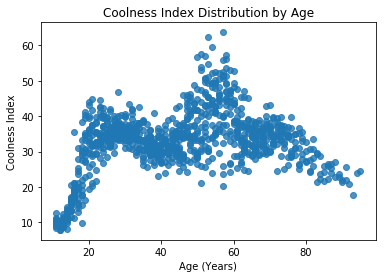

In [29]:
%matplotlib inline

plot = sns.regplot(x=cool["Age"], y=cool["CoolIndex"], fit_reg=False)
plot.set_title('Coolness Index Distribution by Age')
plot.set_xlabel('Age (Years)')
plot.set_ylabel('Coolness Index')

### (b)

In [30]:
coolindex = cool['CoolIndex']
age = cool['Age']
age_bin1 = (age < 22).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = (age >= 77).astype(int)
X_step = pd.DataFrame(dict(age_bin1=age_bin1, age_bin2=age_bin2,
                           age_bin3=age_bin3, age_bin4=age_bin4,
                           age_bin5=age_bin5))
X_step.describe()

,age_bin1,age_bin2,age_bin3,age_bin4,age_bin5
count,956.000000,956.000000,956.000000,956.000000,956.000000
mean,0.162134,0.276151,0.285565,0.217573,0.058577
std,0.368767,0.447326,0.451919,0.412812,0.234955
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
reg = sm.OLS(endog=coolindex, exog=X_step, missing='drop')
reg_results = reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:              CoolIndex   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 19 Feb 2018   Prob (F-statistic):          3.73e-114
Time:                        07:58:32   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.562     35.746      0.0

In [33]:
age.min()

11.0

In [34]:
y = [reg_results.params[0]] + list(reg_results.params)
y

[20.102457252090748,
 20.102457252090748,
 34.475788077559386,
 37.635105492449618,
 35.225400040242754,
 27.296378244321282]

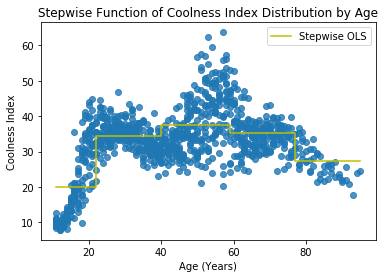

In [35]:
x = [11, 22, 40, 59, 77, 95]

plot2 = sns.regplot(x=cool["Age"], y=cool["CoolIndex"], fit_reg=False)
plot2.set_title('Stepwise Function of Coolness Index Distribution by Age')
plot2.set_xlabel('Age (Years)')
plot2.set_ylabel('Coolness Index')

plt.step(x, y, label="Stepwise OLS",color="y")
plt.legend()

In [36]:
print("The values of beta are as follows:")
print("beta_1: ", reg_results.params[0])
print("beta_2: ", reg_results.params[1])
print("beta_3: ", reg_results.params[2])
print("beta_4: ", reg_results.params[3])
print("beta_5: ", reg_results.params[4])
print("A 73-year-old would have a coolness index score of ", reg_results.params[3])

The values of beta are as follows:
beta_1:  20.1024572521
beta_2:  34.4757880776
beta_3:  37.6351054924
beta_4:  35.2254000402
beta_5:  27.2963782443
A 73-year-old would have a coolness index score of  35.2254000402


### (c)

In [37]:
from scipy.interpolate import LSQUnivariateSpline

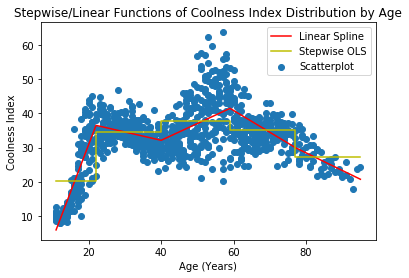

In [38]:
knots = [22, 40, 59, 77]
spl_cool = LSQUnivariateSpline(age.values, coolindex.values, knots, k=1)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)
plt.scatter(age, coolindex, label="Scatterplot")
plt.plot(age_vec, spl_cool(age_vec), 'r-', label="Linear Spline")
plt.step(x, y, label="Stepwise OLS", color="y")
plt.title('Stepwise/Linear Functions of Coolness Index Distribution by Age')
plt.xlabel('Age (Years)')
plt.ylabel('Coolness Index')
plt.legend()

In [39]:
age_73 = np.array([73])
predicted_cool = spl_cool(age_73)
print('Predicted coolness index at 73 from linear spline is', predicted_cool[0])

Predicted coolness index at 73 from linear spline is 32.5368323891


### (d)

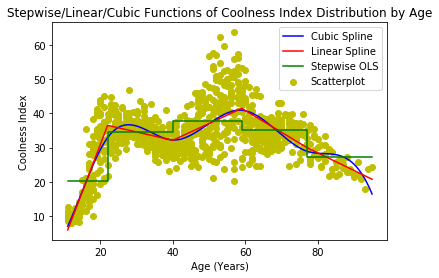

In [40]:
spl_cool_cub = LSQUnivariateSpline(age.values, coolindex.values, knots, k=3)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)
plt.scatter(age, coolindex, label="Scatterplot", color="y")
plt.plot(age_vec, spl_cool_cub(age_vec), color='b', label="Cubic Spline")
plt.plot(age_vec, spl_cool(age_vec), 'r-', label="Linear Spline")
plt.step(x, y, label="Stepwise OLS", color="g")
plt.title('Stepwise/Linear/Cubic Functions of Coolness Index Distribution by Age')
plt.xlabel('Age (Years)')
plt.ylabel('Coolness Index')
plt.legend()

In [41]:
predicted_cool_cub = spl_cool_cub(age_73)
print('Predicted coolness index at 73 from cubic spline is', predicted_cool_cub[0])

Predicted coolness index at 73 from cubic spline is 31.2624293893
